In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fileutil

file_path = fileutil.full_path('data/sales.xlsx')

#读取EXCEL
datafr = pd.read_excel(file_path)

#读取CSV
#datafr = pd.read_csv(file_path, index_col='Date', parse_dates=True)

datafr

root: C:\workspace\python\simple_ipynb


,DATE,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
0,1993-08-08,1.0,1,13,1,13,13
1,1993-08-08,2.0,1,14,1,14,14
2,1993-08-08,3.0,2,7,2,7,14
3,1993-11-19,4.0,2,7,2,7,14
4,1993-12-23,5.0,2,5,2,5,10
...,...,...,...,...,...,...,...
281,2018-02-15,2.0,4,6,4,6,24
282,2018-03-15,2.0,4,6,4,6,24
283,2018-04-12,2.0,5,8,5,8,40
284,2018-05-17,2.0,5,8,5,8,40


In [88]:
#行索引
datafr.index

RangeIndex(start=0, stop=286, step=1)

In [89]:
#列索引
datafr.columns

Index(['DATE', 'PARTN', 'STOCK', 'PROD', 'QTY', 'PRICE', 'TOTAL'], dtype='object')

In [90]:
#空值列
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    286 non-null    datetime64[ns]
 1   PARTN   256 non-null    float64       
 2   STOCK   286 non-null    int64         
 3   PROD    286 non-null    int64         
 4   QTY     286 non-null    int64         
 5   PRICE   286 non-null    int64         
 6   TOTAL   286 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 15.8 KB


In [91]:
#显示空值
datafr.isnull()

,DATE,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False


In [92]:
#空值填充
datafr.fillna(0)
datafr.fillna({'PARTN':0})

,DATE,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
0,1993-08-08,1.0,1,13,1,13,13
1,1993-08-08,2.0,1,14,1,14,14
2,1993-08-08,3.0,2,7,2,7,14
3,1993-11-19,4.0,2,7,2,7,14
4,1993-12-23,5.0,2,5,2,5,10
...,...,...,...,...,...,...,...
281,2018-02-15,2.0,4,6,4,6,24
282,2018-03-15,2.0,4,6,4,6,24
283,2018-04-12,2.0,5,8,5,8,40
284,2018-05-17,2.0,5,8,5,8,40


In [93]:
#表中数值分布
datafr.describe()

,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
count,256.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,3.160156,3.503497,5.321678,3.503497,5.321678,17.237762
std,2.261731,2.017030,3.908787,2.017030,3.908787,17.877540
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,6.000000
50%,2.000000,3.000000,5.000000,3.000000,5.000000,14.000000
75%,5.000000,5.000000,8.000000,5.000000,8.000000,21.000000
max,9.000000,9.000000,25.000000,9.000000,25.000000,175.000000


In [94]:
datafr['PRICE'].dtype

dtype('int64')

In [95]:
#数据指定列去重，并保留first/last行
datafr.drop_duplicates(subset=['PROD'], keep='last').head()

,DATE,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
0,1993-08-08,1.0,1,13,1,13,13
45,1997-11-19,1.0,2,23,2,23,46
46,1997-11-19,2.0,7,25,7,25,175
51,1997-11-19,3.0,5,14,5,14,70
52,1997-11-19,4.0,5,16,5,16,80


In [96]:
#索引列转为数据列
datafr.reset_index()

,index,DATE,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
0,0,1993-08-08,1.0,1,13,1,13,13
1,1,1993-08-08,2.0,1,14,1,14,14
2,2,1993-08-08,3.0,2,7,2,7,14
3,3,1993-11-19,4.0,2,7,2,7,14
4,4,1993-12-23,5.0,2,5,2,5,10
...,...,...,...,...,...,...,...,...
281,281,2018-02-15,2.0,4,6,4,6,24
282,282,2018-03-15,2.0,4,6,4,6,24
283,283,2018-04-12,2.0,5,8,5,8,40
284,284,2018-05-17,2.0,5,8,5,8,40


In [97]:
#指定列作为索引
datafr.reset_index().set_index('DATE')

,index,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
DATE,,,,,,,
1993-08-08,0,1.0,1,13,1,13,13
1993-08-08,1,2.0,1,14,1,14,14
1993-08-08,2,3.0,2,7,2,7,14
1993-11-19,3,4.0,2,7,2,7,14
1993-12-23,4,5.0,2,5,2,5,10
...,...,...,...,...,...,...,...
2018-02-15,281,2.0,4,6,4,6,24
2018-03-15,282,2.0,4,6,4,6,24
2018-04-12,283,2.0,5,8,5,8,40


In [98]:
#删除原有索引，并生成新索引
datafr.reset_index(drop=True)

,DATE,PARTN,STOCK,PROD,QTY,PRICE,TOTAL
0,1993-08-08,1.0,1,13,1,13,13
1,1993-08-08,2.0,1,14,1,14,14
2,1993-08-08,3.0,2,7,2,7,14
3,1993-11-19,4.0,2,7,2,7,14
4,1993-12-23,5.0,2,5,2,5,10
...,...,...,...,...,...,...,...
281,2018-02-15,2.0,4,6,4,6,24
282,2018-03-15,2.0,4,6,4,6,24
283,2018-04-12,2.0,5,8,5,8,40
284,2018-05-17,2.0,5,8,5,8,40


In [99]:
#装入指定列
datafr[['PROD','QTY']]

,PROD,QTY
0,13,1
1,14,1
2,7,2
3,7,2
4,5,2
...,...,...
281,6,4
282,6,4
283,8,5
284,8,5


In [100]:
#查找行列索引对应的数据
datafr.iloc[[0,3,5],[0,2,3,4]]

,DATE,STOCK,PROD,QTY
0,1993-08-08,1,13,1
3,1993-11-19,2,7,2
5,1994-02-15,2,6,2


In [101]:
#查找第一行第一列的数据
datafr.iloc[1,1]

2.0

In [102]:
#行索引查找数据
datafr.loc[12]

DATE     1994-10-25 00:00:00
PARTN                      5
STOCK                      2
PROD                       6
QTY                        2
PRICE                      6
TOTAL                     12
Name: 12, dtype: object

In [103]:
#统计出现次数并降序显示
datafr['PROD'].value_counts(normalize=True,sort=True)

1     0.223776
3     0.122378
6     0.104895
4     0.090909
8     0.076923
7     0.076923
10    0.073427
2     0.055944
5     0.052448
9     0.041958
11    0.027972
12    0.013986
14    0.013986
15    0.010490
23    0.003497
13    0.003497
16    0.003497
25    0.003497
Name: PROD, dtype: float64

In [104]:
#取唯一值
datafr['PROD'].unique()

array([13, 14,  7,  5,  6,  9,  2,  3,  4,  8, 10, 11, 23, 25, 15, 16, 12,
        1], dtype=int64)

In [105]:
datafr['PROD'].isin([10,22])

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285     True
Name: PROD, Length: 286, dtype: bool

In [106]:
#树型显示
datafr.stack()

0    DATE     1993-08-08 00:00:00
     PARTN                      1
     STOCK                      1
     PROD                      13
     QTY                        1
                     ...         
285  STOCK                      5
     PROD                      10
     QTY                        5
     PRICE                     10
     TOTAL                     50
Length: 1972, dtype: object

In [107]:
#宽表转长表
datafr.set_index(['STOCK','PROD']).stack().reset_index()

,STOCK,PROD,level_2,0
0,1,13,DATE,1993-08-08 00:00:00
1,1,13,PARTN,1
2,1,13,QTY,1
3,1,13,PRICE,13
4,1,13,TOTAL,13
...,...,...,...,...
1395,5,10,DATE,2018-06-07 00:00:00
1396,5,10,PARTN,2
1397,5,10,QTY,5
1398,5,10,PRICE,10


In [108]:
#求方差
datafr.var(axis=1)

0       43.200000
1       48.266667
2       21.366667
3       20.400000
4        8.566667
          ...    
281     66.266667
282     66.266667
283    202.266667
284    202.266667
285    326.666667
Length: 286, dtype: float64

In [109]:
#所有数据执行函数
datafr[['QTY','TOTAL']].apply(lambda x:x*100)

,QTY,TOTAL
0,100,1300
1,100,1400
2,200,1400
3,200,1400
4,200,1000
...,...,...
281,400,2400
282,400,2400
283,500,4000
284,500,4000


In [110]:
#分组统计/求和,并重置索引
datafr.groupby('PROD').aggregate(['count','sum']).reset_index().head()

PROD PARTN        STOCK        QTY      PRICE      TOTAL     
       count    sum count  sum count  sum count  sum count  sum
0    1    48  231.0    64  242    64  242    64   64    64  242
1    2    13   42.0    16   82    16   82    16   32    16  164
2    3    33   76.0    35  152    35  152    35  105    35  456
3    4    22   46.0    26  102    26  102    26  104    26  408
4    5    15   25.0    15   39    15   39    15   75    15  195

In [111]:
#数据透视表
pd.pivot_table(data=datafr,values=['QTY','TOTAL'],index='PROD',columns='PARTN',aggfunc={'QTY':'sum','TOTAL':'sum'},fill_value=0,margins=True,margins_name='SUM').to_excel(excel_writer='d:\\stock_pivot.xlsx')

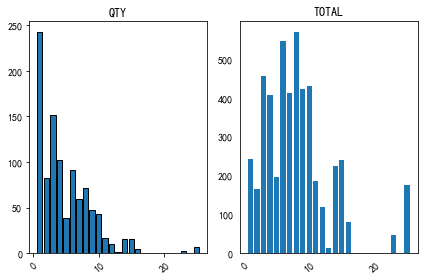

In [112]:
plt.rcParams['font.family'] = ['simhei']
plt.rcParams['figure.autolayout'] = True

fig, axes = plt.subplots(1, 2)
ax1 = axes[0]
ax2 = axes[1]

pt = pd.pivot_table(data=datafr,values=['QTY','TOTAL'],index=['PROD'],aggfunc={'QTY':'sum','TOTAL':'sum'},fill_value=0)

ax1.bar(x=pt.index, height=pt.QTY, edgecolor='k')
ax2.bar(x=pt.index, height=pt.TOTAL)

ax1.set_title('QTY')
ax2.set_title('TOTAL')

for tick in ax1.get_xticklabels():
    tick.set_rotation(40)
for tick in ax2.get_xticklabels():
    tick.set_rotation(40)

plt.tick_params(bottom=False, left=False)
plt.show()

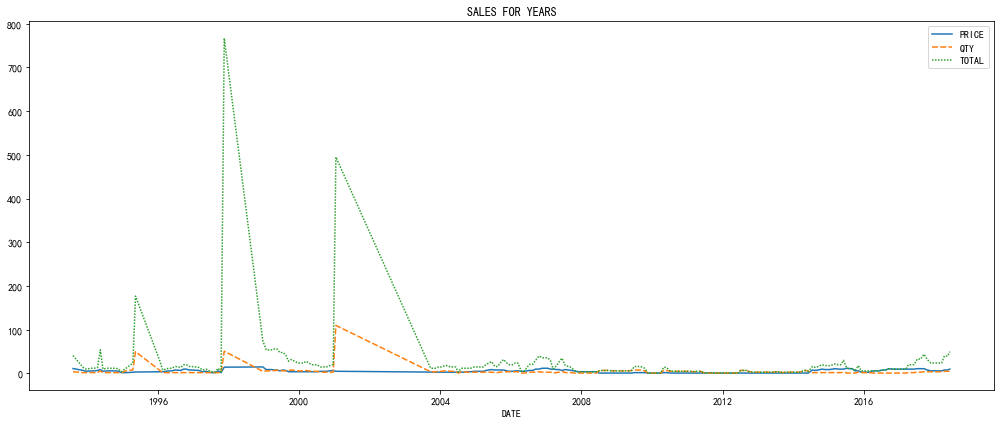

In [113]:
plt.figure(figsize=(14,6))
plt.title("SALES FOR YEARS")

pt2 = pd.pivot_table(data=datafr,values=['QTY','TOTAL','PRICE'],index=['DATE'],aggfunc={'QTY':np.sum,'TOTAL':np.sum,'PRICE':np.average},fill_value=0)

sns.lineplot(data=pt2)